<a href="https://colab.research.google.com/github/igor-sharipov1/dataScience/blob/main/Aprioiri_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1 dataset
df = pd.read_csv('/content/retail_dataset.csv', sep=',') 

# 2 dataset
#df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

df = df.dropna()
df.head(10)

counts = []
waisted_time = []

Подгружаем используемые библиотеки, считываем файл с данными формата .csv 

In [ ]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{'Pencil', 'Eggs', 'Milk', 'Wine', 'Meat', 'Bread', 'Cheese', 'Bagel', 'Diaper'}


Создаем множество всех встречающися в файле элементов

In [ ]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

Преобразуем исходный файл с данными в DataFrame, описывающий частые наборы 

In [ ]:
def start_frequencies_set(min_supp):
  start_time = time.time()
  freq_items = apriori(ohe_df, min_support=min_supp, use_colnames=True)
  end_time = time.time()
  waisted_time.append(end_time - start_time)
  counts.append(freq_items["itemsets"].count())
  print(freq_items)

Функция для выполнения алгоритма Apriori и подсчета времени, и количества частых наборов для заданного порогового значения поддержки

In [ ]:
start_frequencies_set(0.01)

      support                                           itemsets
0    0.682927                                            (Bagel)
1    0.707317                                             (Milk)
2    0.731707                                           (Pencil)
3    0.780488                                             (Eggs)
4    0.829268                                             (Meat)
..        ...                                                ...
468  0.024390   (Eggs, Meat, Wine, Bread, Cheese, Bagel, Diaper)
469  0.121951    (Pencil, Eggs, Milk, Meat, Wine, Bread, Cheese)
470  0.073171  (Pencil, Milk, Meat, Wine, Bread, Cheese, Diaper)
471  0.048780    (Eggs, Milk, Meat, Wine, Bread, Cheese, Diaper)
472  0.073171  (Pencil, Eggs, Meat, Wine, Bread, Cheese, Diaper)

[473 rows x 2 columns]


In [ ]:
start_frequencies_set(0.03)

      support                                           itemsets
0    0.682927                                            (Bagel)
1    0.707317                                             (Milk)
2    0.731707                                           (Pencil)
3    0.780488                                             (Eggs)
4    0.829268                                             (Meat)
..        ...                                                ...
455  0.048780  (Pencil, Meat, Wine, Bread, Cheese, Bagel, Dia...
456  0.121951    (Pencil, Eggs, Milk, Meat, Wine, Bread, Cheese)
457  0.073171  (Pencil, Milk, Meat, Wine, Bread, Cheese, Diaper)
458  0.048780    (Eggs, Milk, Meat, Wine, Bread, Cheese, Diaper)
459  0.073171  (Pencil, Eggs, Meat, Wine, Bread, Cheese, Diaper)

[460 rows x 2 columns]


In [ ]:
start_frequencies_set(0.05)

      support                                           itemsets
0    0.682927                                            (Bagel)
1    0.707317                                             (Milk)
2    0.731707                                           (Pencil)
3    0.780488                                             (Eggs)
4    0.829268                                             (Meat)
..        ...                                                ...
428  0.146341          (Eggs, Meat, Wine, Bread, Cheese, Diaper)
429  0.097561  (Pencil, Eggs, Meat, Wine, Cheese, Bagel, Diaper)
430  0.121951    (Pencil, Eggs, Milk, Meat, Wine, Bread, Cheese)
431  0.073171  (Pencil, Milk, Meat, Wine, Bread, Cheese, Diaper)
432  0.073171  (Pencil, Eggs, Meat, Wine, Bread, Cheese, Diaper)

[433 rows x 2 columns]


In [ ]:
start_frequencies_set(0.1)

      support                                         itemsets
0    0.682927                                          (Bagel)
1    0.707317                                           (Milk)
2    0.731707                                         (Pencil)
3    0.780488                                           (Eggs)
4    0.829268                                           (Meat)
..        ...                                              ...
369  0.170732       (Pencil, Eggs, Meat, Wine, Cheese, Diaper)
370  0.121951      (Pencil, Eggs, Wine, Bread, Cheese, Diaper)
371  0.195122      (Pencil, Meat, Wine, Bread, Cheese, Diaper)
372  0.146341        (Eggs, Meat, Wine, Bread, Cheese, Diaper)
373  0.121951  (Pencil, Eggs, Milk, Meat, Wine, Bread, Cheese)

[374 rows x 2 columns]


In [ ]:
start_frequencies_set(0.15)

      support                                     itemsets
0    0.682927                                      (Bagel)
1    0.707317                                       (Milk)
2    0.731707                                     (Pencil)
3    0.780488                                       (Eggs)
4    0.829268                                       (Meat)
..        ...                                          ...
316  0.170732      (Eggs, Milk, Meat, Wine, Bread, Cheese)
317  0.170732    (Milk, Meat, Wine, Bread, Cheese, Diaper)
318  0.195122    (Pencil, Eggs, Meat, Wine, Bread, Cheese)
319  0.170732   (Pencil, Eggs, Meat, Wine, Cheese, Diaper)
320  0.195122  (Pencil, Meat, Wine, Bread, Cheese, Diaper)

[321 rows x 2 columns]


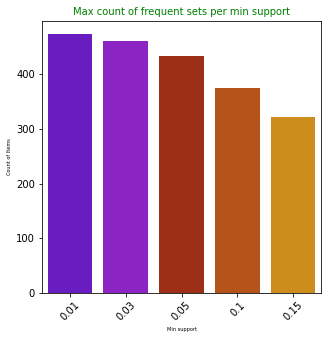

Counts: [473, 460, 433, 374, 321]


In [ ]:
min_supps = [0.01, 0.03,0.05, 0.1, 0.15]
plt.figure(figsize=(5,5))
sns.barplot(x = min_supps, y = counts, palette = 'gnuplot')
plt.xlabel('Min support', size = 5)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 5)
plt.title('Count of frequent sets per min support', color = 'green', size = 10)
plt.show()
print("Counts:",counts)

На графике видна зависимость количества частых наборов при выполнении алгоритма Aprioiri от порогового значения поддержки, можно сделать вывод, что при увеличении параметра min_supp количество частых наборов уменьшается

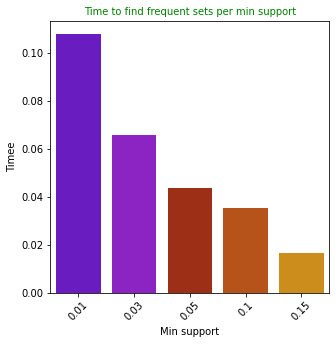

Time: [0.10782837867736816, 0.0657343864440918, 0.04387784004211426, 0.03550863265991211, 0.016640186309814453]


In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x = min_supps, y = waisted_time, palette = 'gnuplot')
plt.xlabel('Min support', size = 10)
plt.xticks(rotation=45)
plt.ylabel('Timee', size = 10)
plt.title('Time to find frequent sets per min support', color = 'green', size = 10)
plt.show()
print("Time:",waisted_time)

На графике видна зависимость времени выполнения алгоритма Aprioiri от порогового значения поддержки, можно сделать вывод, что при увеличении параметра min_supp время, затрачиваемое на проход по алгоритму меньше